In [42]:
import pandas as pd
import os
import os.path as osp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [43]:
data_dir = './housing'

train = pd.read_csv(osp.join(data_dir, 'train.csv'))
test = pd.read_csv(osp.join(data_dir, 'test.csv'))

train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


id: 데이터 고유 id

OverallQual: 전반적 재료, 마감 품질

YearBuilt: 완공 연도

YearRemodAdd: 리모델링 연도

ExterQual: 외관 재료 품질

BsmtQual: 지하실 높이

TotalBsmtSF: 지하실 면적

1stFlrSF: 1층 면적

GrLivArea: 지상층 생활 면적

FullBath: 지상층 화장실 개수

KitchenQual: 부억 품질

GarageYrBlt: 차고 완공 연도

GarageCars: 차고 자리 개수

GarageArea: 차고 면적

target: 집값(달러 단위)

In [44]:
# 먼저 필요없는 id를 제거해주자
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

# pycaret부터 돌려서 어떤 피쳐들이 중요한지 파악해보자.

In [45]:
from pycaret.regression import *

setup_model = setup(data=train, target='target')

,Description,Value
0,session_id,6679
1,Target,target
2,Original Data,"(1350, 14)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(944, 37)"


In [46]:
top5 = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,18127.2830,803680828.9545,27669.1078,0.8603,0.1514,0.1088,0.3710
rf,Random Forest Regressor,18564.2637,797512717.5905,27728.7052,0.8610,0.1605,0.1156,0.0690
ridge,Ridge Regression,18695.1569,750581780.7383,26925.1134,0.8692,0.1572,0.1149,0.0040
br,Bayesian Ridge,18713.3125,755140516.3380,26997.3592,0.8685,0.1573,0.1155,0.0040
llar,Lasso Least Angle Regression,18740.1324,751611429.4745,26944.1371,0.8692,0.1642,0.1136,0.0040
lasso,Lasso Regression,18762.3667,752492954.2493,26959.9884,0.8690,0.1649,0.1138,0.2700
lr,Linear Regression,18772.4326,753122993.3794,26970.3104,0.8689,0.1655,0.1138,0.6630
gbr,Gradient Boosting Regressor,18987.6952,842609883.8776,28579.0299,0.8487,0.1626,0.1163,0.0220
lightgbm,Light Gradient Boosting Machine,19153.8346,851095774.2483,28745.3056,0.8483,0.1590,0.1163,0.1430
et,Extra Trees Regressor,19728.9580,875811190.7116,29112.5190,0.8457,0.1624,0.1189,0.0570


In [47]:
catboost = create_model('catboost', verbose = False)

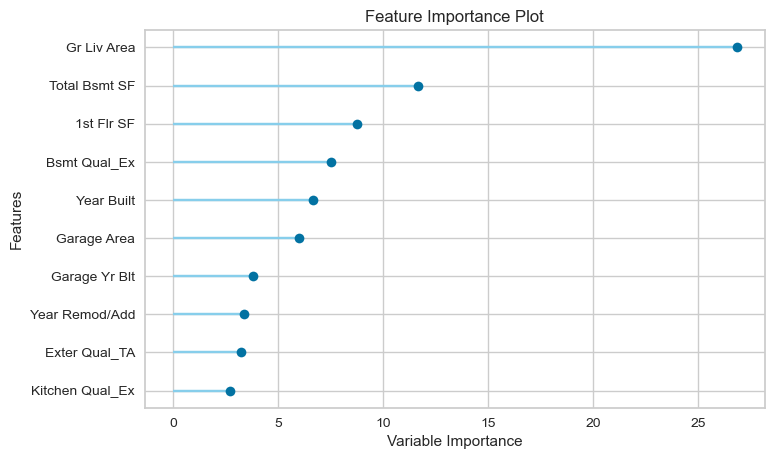

In [48]:
plot_model(catboost, plot = 'feature')

# 대략적으로 중요한 피쳐를 알았으니, 이 순서대로 각각의 데이터들을 알아보자

<AxesSubplot:xlabel='target', ylabel='Density'>

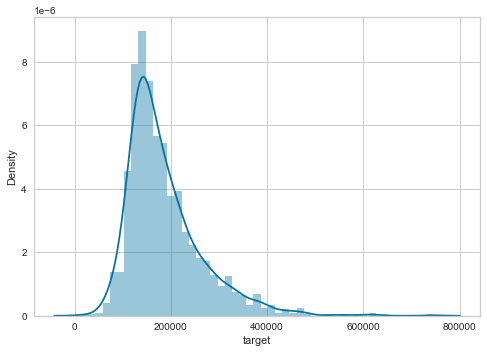

In [49]:
import seaborn as sns

sns.distplot(train['target'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


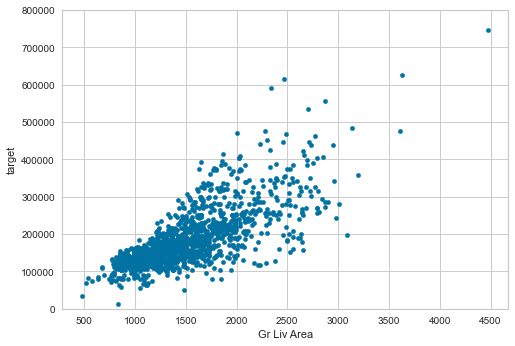

In [50]:
var = 'Gr Liv Area'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


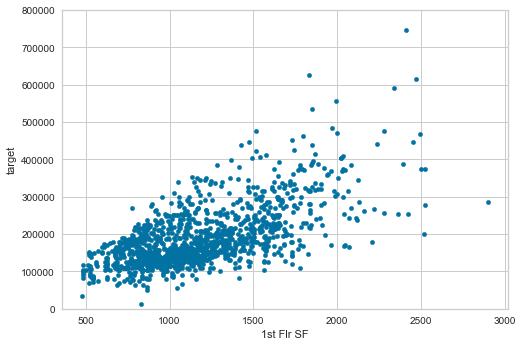

In [51]:
var = '1st Flr SF'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


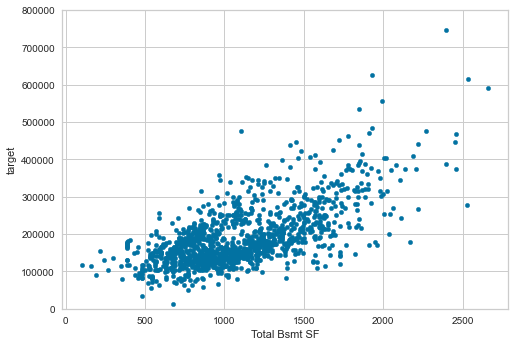

In [52]:
var = 'Total Bsmt SF'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

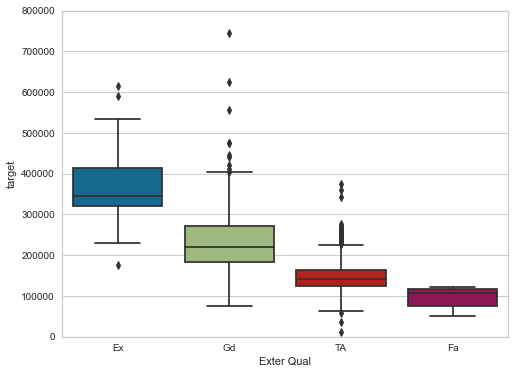

In [53]:
import matplotlib.pyplot as plt

var = 'Exter Qual'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=800000);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


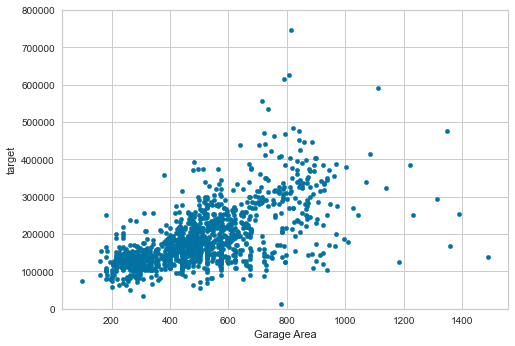

In [54]:
var = 'Garage Area'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


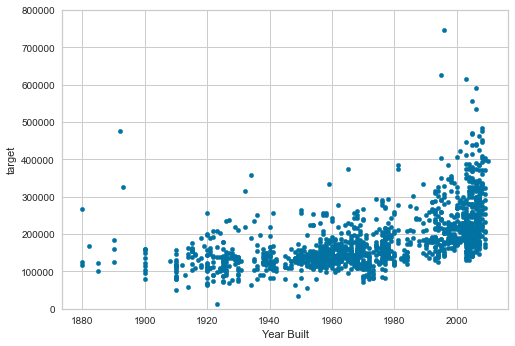

In [55]:
var = 'Year Built'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

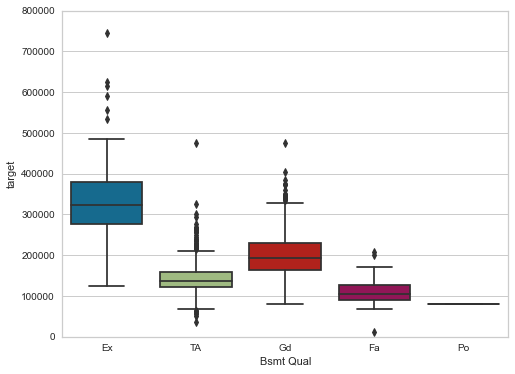

In [56]:
var = 'Bsmt Qual'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=800000);

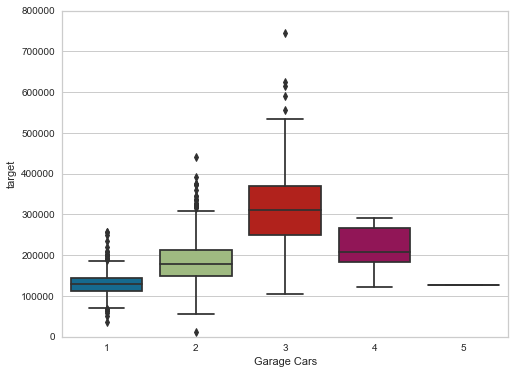

In [57]:
var = 'Garage Cars'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=800000);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


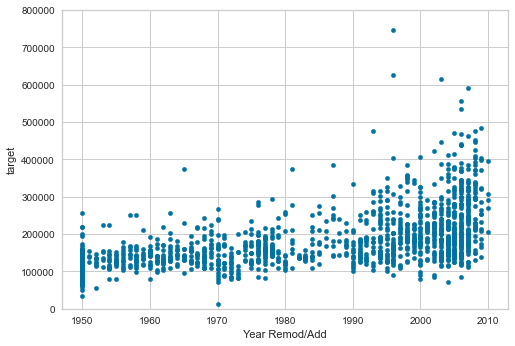

In [58]:
var = 'Year Remod/Add'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


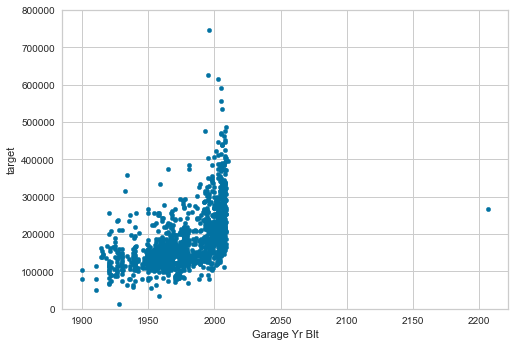

In [59]:
var = 'Garage Yr Blt'
data = pd.concat([train['target'], train[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

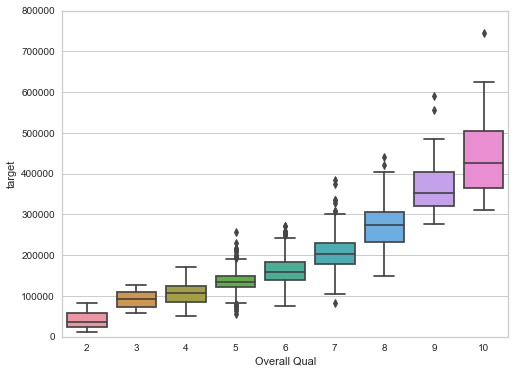

In [60]:
var = 'Overall Qual'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=800000);

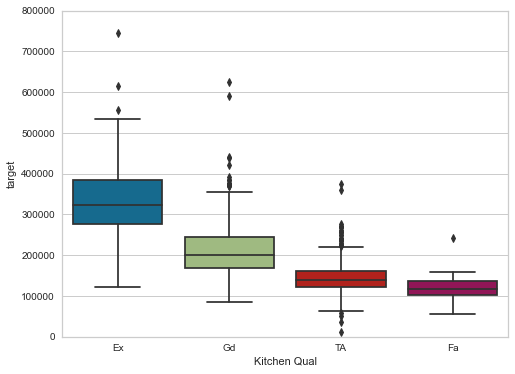

In [61]:
var = 'Kitchen Qual'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=800000);

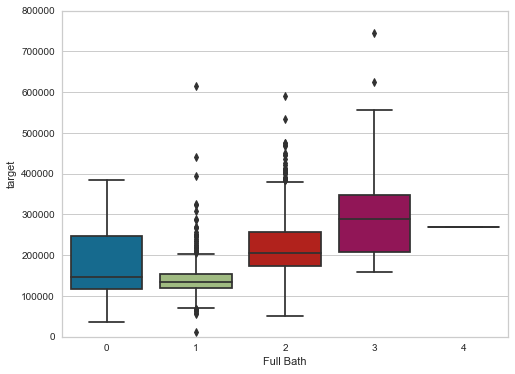

In [62]:
var = 'Full Bath'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=800000);

# 대부분의 값들이 선형성을 띄고 있다.

## 집값에 아웃라이어를 정하기가 애매하지만, Garage Yr Blt에서 오지도 않은 연도가 있는 것을 확인할 수 있다.

In [63]:
train.loc[train['Garage Yr Blt'] >= 2100]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


In [64]:
# 해당 데이터는 2006년에 집을 짓고 리모델링을 2007년에 하면서 차고도 추가된 것으로 추측된다.
# 그래서 2207 대신 2007로 변경하자
train.loc[train['Garage Yr Blt'] >= 2100,'Garage Yr Blt'] = 2007

## 집을 판단할 때, 신축인지 or 리모델링을 최근 했는지 파악을 하는 것이 중요한 요소라고 생각되었다. 그렇다면 각각의 요소들 다시 한번 보자.

In [65]:
# 먼저 집을 지은 연도보다 리모델링한 연도가 이전에 있는지 확인해보자.
# 그런 연도는 없다
train[train['Year Built'] > train['Year Remod/Add']]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target


In [66]:
# 집을 지은 연도와 리모델링한 연도가 동일한 데이터가 몇개인지보자.
# 대부분의 데이터가 동일하다 -> 집을 짓고 리모델링을 하지 않았으면, 지은 연도와 같다는뜻.. 아마 끝에 붙은 ADD의 의미가 이런 뜻인듯하다.
train[train['Year Built'] == train['Year Remod/Add']]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
6,6,1478,TA,2,442,TA,1478,1478,TA,1,1957,1957,1957,156500
7,8,2524,Gd,2,542,Gd,2524,2524,Gd,2,1981,1981,1981,278000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,5,925,TA,2,484,TA,925,925,TA,1,1963,1963,1990,133500
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [67]:
# 리모델링을 진행한 집들이다.
train[train['Year Built'] < train['Year Remod/Add']]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
5,8,1968,Gd,3,680,Ex,774,774,Ex,2,2009,2010,2009,269500
8,8,2649,Gd,3,746,Gd,1479,1515,Ex,2,2001,2002,2001,421250
10,3,840,TA,1,250,Fa,798,840,TA,1,1920,1950,1938,64000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,4,572,TA,1,200,TA,572,572,TA,1,1925,1950,1940,75000
1342,6,2614,TA,2,624,TA,1522,1548,TA,2,1974,1997,1974,240000
1343,5,960,TA,1,392,Fa,960,960,TA,1,1959,2000,1959,131750
1344,6,865,TA,1,216,TA,660,740,TA,1,1920,1995,1920,108500


## 여기서 우리가 생각해야 할 것은 리모델링을 실시하였다면, 집을 지은 연도는 집값을 파악하는데 중요한 요소가 아닐 수도 있다. 오래된 집이여도 리모델링을 최근에 하였다면, 그 집의 가치가 더 높다고 판단된다. 

## 리모델링을 한 시점에서 이전에 집을 지은 시점을 뺀 값을 피쳐로 추가한다면, 우리는 이 값이 높을수록 이 집에 대한 가치를 올릴 수 있는 하나의 지표라고 생각할 수도 있다. 

## 최근에 지은 집은 이 값이 낮아도 큰 영향이 없다고 볼 수 있으나, 오래된 집은 이 값이 높아야 집값에 대해서 조금 더 나은 가격을 받을 수 있다.

In [68]:
train['Built diff Remod'] = train['Year Remod/Add'] - train['Year Built']
test['Built diff Remod'] = test['Year Remod/Add'] - test['Year Built']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


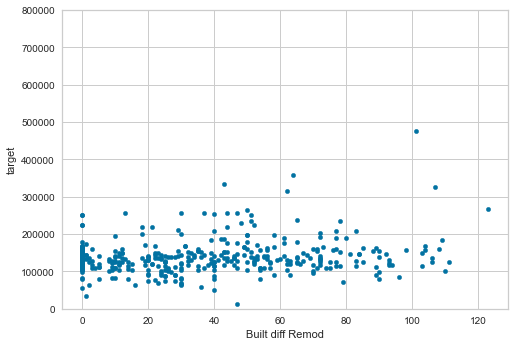

In [69]:
# 약하게 선형성이 보이긴 한다..

var = 'Built diff Remod'
temp = train.loc[train['Year Built'] < 1960]
data = pd.concat([temp['target'], temp[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,800000));

## 현재 주택이 지상층 면적과 1층의 면적만 나와서 이 집이 여러층인지, 단층인지 알 수가 없다..
## 지하실 여부만 알 수 있으니, 이 집이 1층인지 아닌 지 지상층면적과 1층의 면적을 토대로 추가하자

In [70]:
train['2nd Flr OX'] = (train['Gr Liv Area'] - train['1st Flr SF']).apply(lambda x : 'O' if x > 0 else 'X')
test['2nd Flr OX'] = (test['Gr Liv Area'] - test['1st Flr SF']).apply(lambda x : 'O' if x > 0 else 'X')

In [71]:
## 이제는 pycaret님이 해결할 때 이다..

In [72]:
from pycaret.regression import *

setup_after_pre = setup(data=train, target='target')

,Description,Value
0,session_id,2525
1,Target,target
2,Original Data,"(1350, 16)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(944, 41)"


In [73]:
top5 = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,18110.7040,759649250.0749,27229.4939,0.8773,0.1491,0.1082,0.3700
gbr,Gradient Boosting Regressor,19075.6543,836932612.4031,28669.4677,0.8620,0.1576,0.1145,0.0230
rf,Random Forest Regressor,19210.7011,868027132.2621,29138.3260,0.8598,0.1607,0.1167,0.0670
ridge,Ridge Regression,19504.3868,770411852.6407,27511.7153,0.8743,0.1573,0.1187,0.0040
llar,Lasso Least Angle Regression,19506.4427,768252177.6856,27472.4804,0.8741,0.1534,0.1176,0.0040
lasso,Lasso Regression,19527.1213,769169395.3271,27492.1451,0.8739,0.1536,0.1177,0.0050
br,Bayesian Ridge,19532.1691,775376130.7372,27593.3905,0.8736,0.1579,0.1190,0.0040
lr,Linear Regression,19534.5210,769119983.1204,27491.3604,0.8739,0.1534,0.1177,0.0040
xgboost,Extreme Gradient Boosting,19837.0884,891010828.7562,29736.1937,0.8505,0.1638,0.1192,0.0580
lightgbm,Light Gradient Boosting Machine,20206.4322,938614934.4537,30314.9124,0.8470,0.1648,0.1210,0.0890


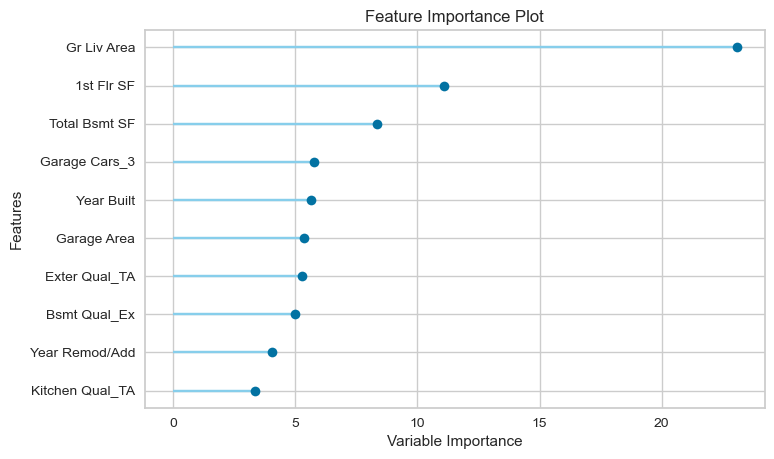

In [74]:
catboost = create_model('catboost', verbose = False)
plot_model(catboost, plot = 'feature')

In [75]:
tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18734.6717,605681419.6329,24610.5957,0.9146,0.1304,0.1020
1,19079.4627,738101572.0069,27168.0248,0.8708,0.1319,0.1010
2,18485.3553,667349715.7412,25833.1128,0.8893,0.2300,0.1568
3,16613.9330,596348411.9296,24420.2459,0.8789,0.1174,0.0896
4,23147.6892,1208284810.2158,34760.3914,0.8850,0.1999,0.1482
5,17358.1102,489560784.8214,22126.0205,0.8957,0.1288,0.0986
6,22807.9555,1107240643.0205,33275.2257,0.8479,0.1635,0.1285
7,19314.7662,711365954.0588,26671.4445,0.8142,0.1344,0.1245
8,19753.4234,840544583.4733,28992.1469,0.9101,0.1383,0.1068
9,19694.6678,700368107.5797,26464.4688,0.8380,0.1479,0.1194


In [76]:
blender_top5 = blend_models(estimator_list=tuned_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17378.0987,527712128.6035,22971.9857,0.9256,0.1143,0.0902
1,18171.4158,688288808.5473,26235.2589,0.8795,0.1361,0.1016
2,17400.4009,779515327.7512,27919.8017,0.8707,0.2433,0.1626
3,15172.7890,544555758.0818,23335.7185,0.8894,0.1095,0.0795
4,22276.5340,1421547523.7777,37703.4153,0.8647,0.1882,0.1349
5,16541.3378,480346813.2382,21916.8158,0.8977,0.1190,0.0910
6,20030.3486,898351614.7530,29972.5143,0.8766,0.1535,0.1151
7,16715.7222,634670623.5605,25192.6700,0.8342,0.1314,0.0987
8,18104.5121,777300784.4183,27880.1145,0.9169,0.1353,0.1011
9,17680.7780,641943418.4597,25336.6023,0.8515,0.1444,0.1090


In [77]:
final_model = finalize_model(blender_top5)
prediction = predict_model(final_model, data=test)

In [78]:
sub = pd.read_csv(osp.join(data_dir, 'sample_submission.csv'))
sub['target'] = prediction['Label']
sub

,id,target
0,1,326634.553028
1,2,127572.221058
2,3,179277.783966
3,4,273063.891978
4,5,129504.162075
...,...,...
1345,1346,338488.699285
1346,1347,122194.414613
1347,1348,79360.606049
1348,1349,214295.607653


In [79]:
sub_dir = './housing/sub'
sub.to_csv(osp.join(sub_dir, 'submit1.csv'), index=False) 